In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from keras import backend as K

input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding ='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()





Using TensorFlow backend.


<Figure size 2000x200 with 9 Axes>

In [2]:

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


# use Matplotlib (don't ask)
decoded_imgs = autoencoder.predict(x_test)



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2436 - val_loss: 0.1838
Epoch 2/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1759 - val_loss: 0.1662
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1611 - val_loss: 0.1544
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1534 - val_loss: 0.1473
Epoch 5/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1486 - val_loss: 0.1441
Epoch 6/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1454 - val_loss: 0.1395
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1428 - val_loss: 0.1433
Epoch 8/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1407 - val_loss: 0.1402
Epoch 9/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1389 - val_loss: 0.1

60000/60000 [==============================] - 3s 52us/step - loss: 0.1214 - val_loss: 0.1218
Epoch 78/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1215 - val_loss: 0.1194
Epoch 79/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1213 - val_loss: 0.1208
Epoch 80/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1211 - val_loss: 0.1187
Epoch 81/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1211 - val_loss: 0.1205
Epoch 82/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1211 - val_loss: 0.1200
Epoch 83/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1209 - val_loss: 0.1185
Epoch 84/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1209 - val_loss: 0.1214
Epoch 85/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1207 - val_loss: 0.1195
Epoch 86/100
60000/60000 [========================

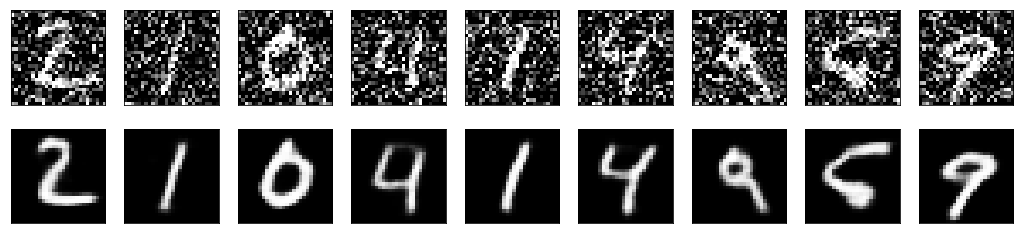

In [4]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()